In [33]:
# Data analysis
import geopandas as gpd
import numpy as np
import pandas as pd
from shapely.geometry import Point

# Plotting
import folium
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.colors
from matplotlib.patches import Patch
import altair as alt
import holoviews as hv
import hvplot.pandas
import geoviews as gv
import geoviews.tile_sources as gvts
import datashader as ds
import datashader.transfer_functions as tf
from datashader.colors import Greys9, viridis, inferno
import colorcet as cc


pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings("ignore")
#warnings.filterwarnings("default")
import logging
logging.getLogger('numba.core.byteflow').setLevel(logging.WARNING)
logging.getLogger("fsspec").setLevel(logging.WARNING)

## Part 2 - A Close Look Into America's Cellular Landscape


### Statewide Analysis Of Cellular Tower Distribution Throughout The United States

In our  analysis of cellular tower coverage across the United States, we delve into a rich dataset provided by the [Federal Communications Commission (FCC)](https://hifld-geoplatform.opendata.arcgis.com/datasets/geoplatform::cellular-towers/about). This dataset meticulously records cellular tower locations nationwide, offering crucial insights into the nation's telecommunications infrastructure. While primarily intended for informational use in GIS systems and general planning, and not for precise engineering or legal delineation of FCC market boundaries, the data still provides a valuable snapshot of cellular network distribution. In the first interactive map and graph we look at the total distribution of Cell towers by state. The distribution of cell towers is uneven, with high concentrations in certain areas, such as the West Coast and Eastern Seaboard, and relatively sparse distributions in the central states. The graph shows that Texas, California, and Florida possess the highest numbers of cell towers, aligning with their status as the three most populous states in the USA. This suggests a correlation between population density and the number of cell towers needed to serve the residents.

In [34]:
cell_towers_gdf = gpd.read_file("./Data/Cellular_Towers_in_the_United_States2.csv",vcrs='4326')
state_boundaries_gdf = gpd.read_file('./Data/states.json', crs='4326')

cell_towers_gdf['londec'] = pd.to_numeric(cell_towers_gdf['londec'], errors='coerce')
cell_towers_gdf['latdec'] = pd.to_numeric(cell_towers_gdf['latdec'], errors='coerce')

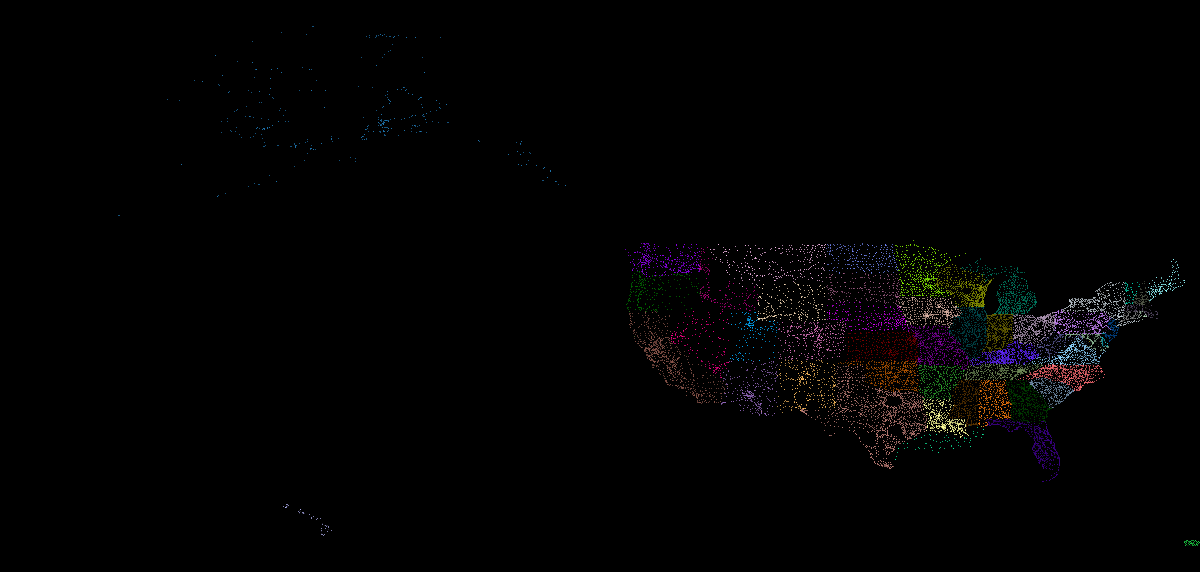

In [35]:
bounds = state_boundaries_gdf.total_bounds
x_range_padding = 0  
y_range_padding = (bounds[3] - bounds[1]) * 0.05  

x_range = (bounds[0] - x_range_padding, bounds[2] + x_range_padding)
y_range = (bounds[1] - y_range_padding, bounds[3] + y_range_padding)

plot_width = 1200  
plot_height = int(plot_width * (y_range[1] - y_range[0]) / (x_range[1] - x_range[0]))

if cell_towers_gdf.crs is None:
    cell_towers_gdf.set_crs(epsg=4326, inplace=True)

cell_towers_gdf = cell_towers_gdf.to_crs(state_boundaries_gdf.crs)

cell_towers_gdf['LocState'] = cell_towers_gdf['LocState'].astype('category')

canvas = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

agg = canvas.points(cell_towers_gdf, 'londec', 'latdec', ds.count_cat('LocState'))

color_key = {str(state): color for state, color in zip(cell_towers_gdf['LocState'].cat.categories, cc.b_glasbey_category10)}

spread_plot = tf.spread(agg, px=1)

plot = tf.set_background(tf.shade(agg, color_key=color_key), "black")
plot


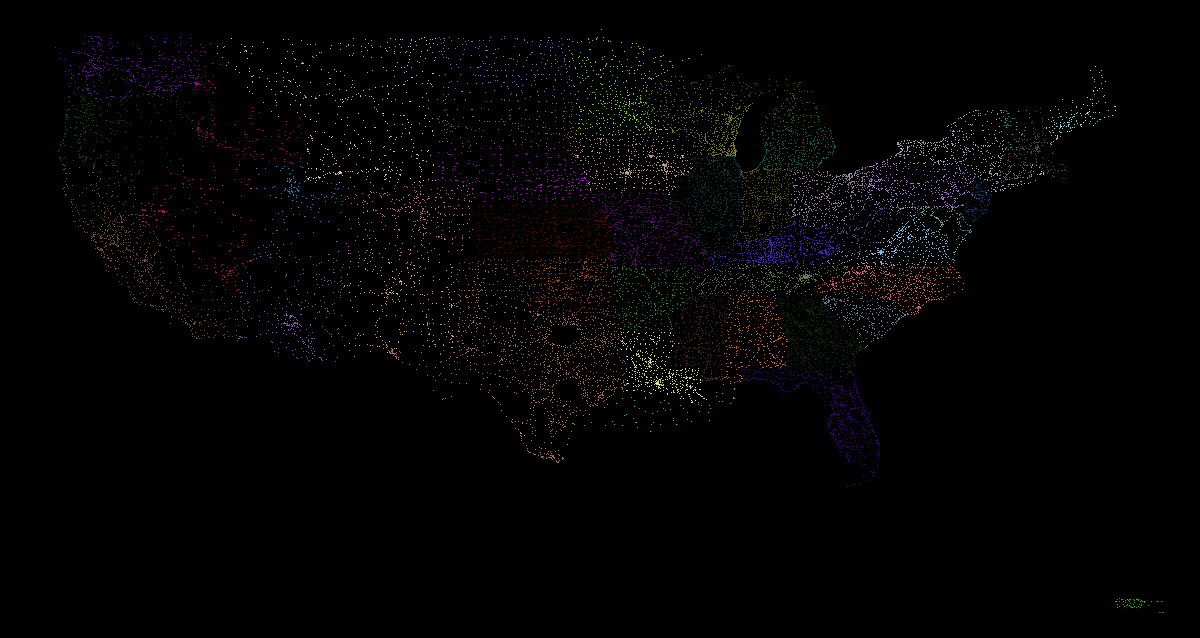

In [36]:
state_boundaries_gdf = state_boundaries_gdf[~state_boundaries_gdf['name'].isin(['Alaska', 'Hawaii'])]

bounds = state_boundaries_gdf.total_bounds

x_range_padding = (bounds[2] - bounds[0]) * 0.05 
y_range_padding = (bounds[3] - bounds[1]) * 0.05

x_range = (bounds[0] - x_range_padding, bounds[2] + x_range_padding)
y_range = (bounds[1] - y_range_padding, bounds[3] + y_range_padding)

plot_width = 1200
plot_height = int(plot_width * (y_range[1] - y_range[0]) / (x_range[1] - x_range[0]))

if cell_towers_gdf.crs is None:
    cell_towers_gdf.set_crs(epsg=4326, inplace=True)

cell_towers_gdf = cell_towers_gdf.to_crs(state_boundaries_gdf.crs)

cell_towers_gdf['LocState'] = cell_towers_gdf['LocState'].astype('category')

canvas = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

agg = canvas.points(cell_towers_gdf, 'londec', 'latdec', ds.count_cat('LocState'))

color_key = {str(state): color for state, color in zip(cell_towers_gdf['LocState'].cat.categories, cc.b_glasbey_category10)}

spread_plot = tf.spread(plot, px=1)

plot = tf.set_background(tf.shade(agg, color_key=color_key), "black")
plot


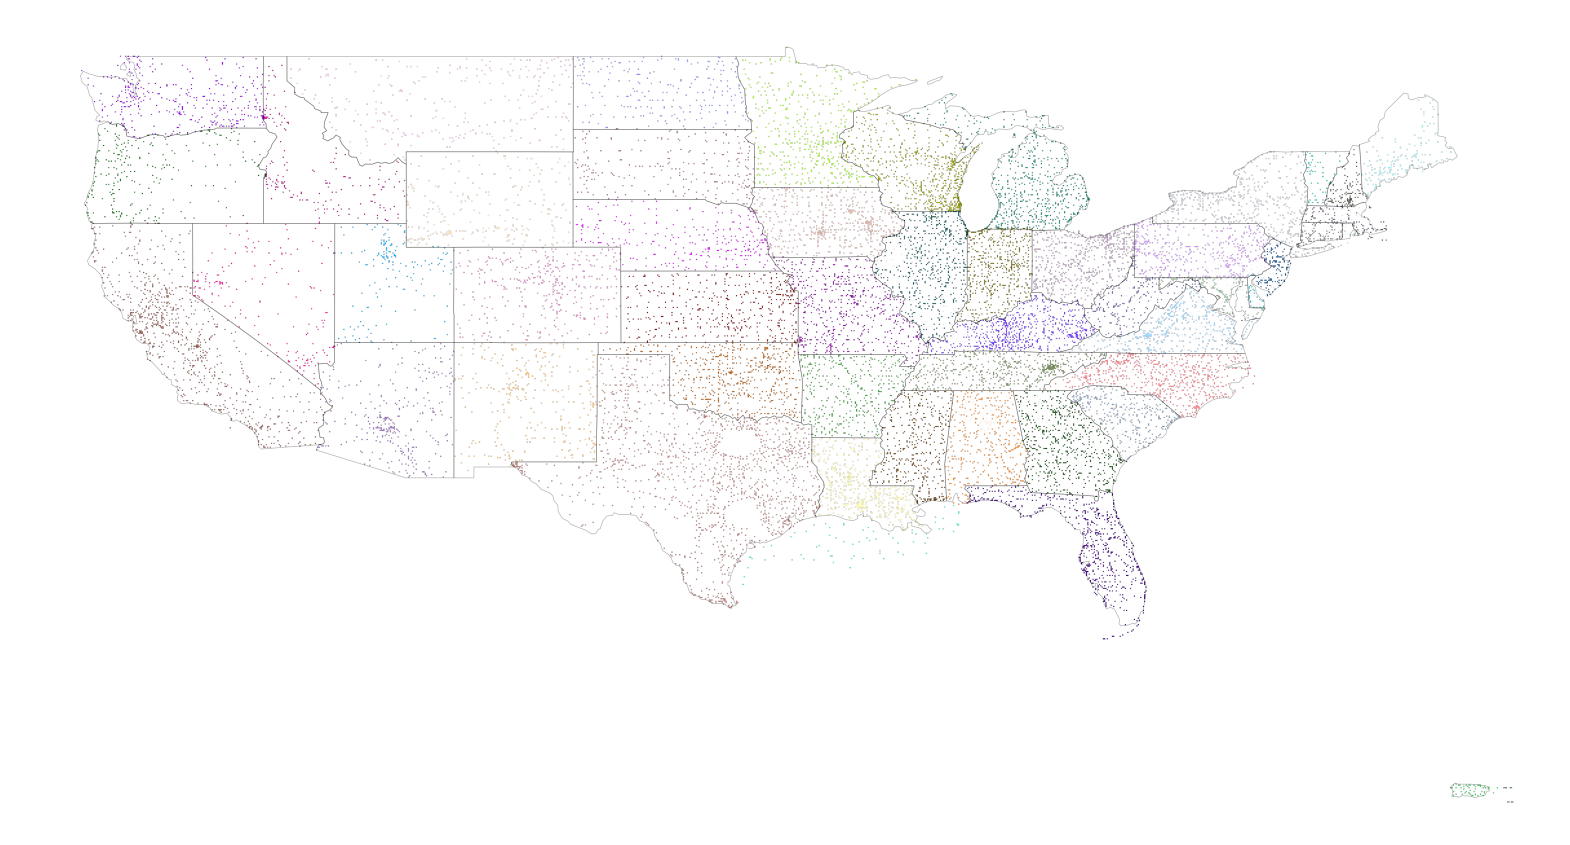

In [37]:

state_boundaries_gdf = gpd.read_file('./Data/states.json')

state_boundaries_gdf = state_boundaries_gdf[~state_boundaries_gdf['name'].isin(['Alaska', 'Hawaii'])]

bounds = state_boundaries_gdf.total_bounds

x_range_padding = (bounds[2] - bounds[0]) * 0.05
y_range_padding = (bounds[3] - bounds[1]) * 0.05

x_range = (bounds[0] - x_range_padding, bounds[2] + x_range_padding)
y_range = (bounds[1] - y_range_padding, bounds[3] + y_range_padding)

plot_width = 1200 
plot_height = int(plot_width * (y_range[1] - y_range[0]) / (x_range[1] - x_range[0]))

if cell_towers_gdf.crs is None:
    cell_towers_gdf.set_crs(epsg=4326, inplace=True)

cell_towers_gdf = cell_towers_gdf.to_crs(state_boundaries_gdf.crs)

cell_towers_gdf['LocState'] = cell_towers_gdf['LocState'].astype('category')

canvas = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)

agg = canvas.points(cell_towers_gdf, 'londec', 'latdec', ds.count_cat('LocState'))

color_key = {str(state): color for state, color in zip(cell_towers_gdf['LocState'].cat.categories, cc.b_glasbey_category10)}

plot = tf.shade(agg, color_key=color_key)

img = plot.to_pil()

dpi = 100
fig_width_in = plot_width / dpi
fig_height_in = plot_height / dpi

fig, ax = plt.subplots(figsize=(20,17))
fig.patch.set_facecolor('white')

state_boundaries_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5, alpha=0.3)

ax.imshow(img, extent=[x_range[0], x_range[1], y_range[0], y_range[1]])

ax.set_facecolor('white')
ax.axis('off')

plt.show()

In [38]:
state_counts = cell_towers_gdf.groupby('LocState').size().reset_index(name='Count')

bar_chart = alt.Chart(state_counts).mark_bar().encode(
    x=alt.X('Count:Q', title='Number of Cell Towers'),
    y=alt.Y('LocState:N', title='State', sort='-x'),
    color=alt.Color('Count:Q', scale=alt.Scale(scheme='plasma')),
    tooltip=['LocState:N', 'Count:Q']
).interactive()

styled_chart = bar_chart.configure_view(
    strokeWidth=0,
    fill='#000'
).properties(
    title='Number of Cell Towers per State',
    width=600,
    height=800
)

styled_chart

alt.Chart(...)

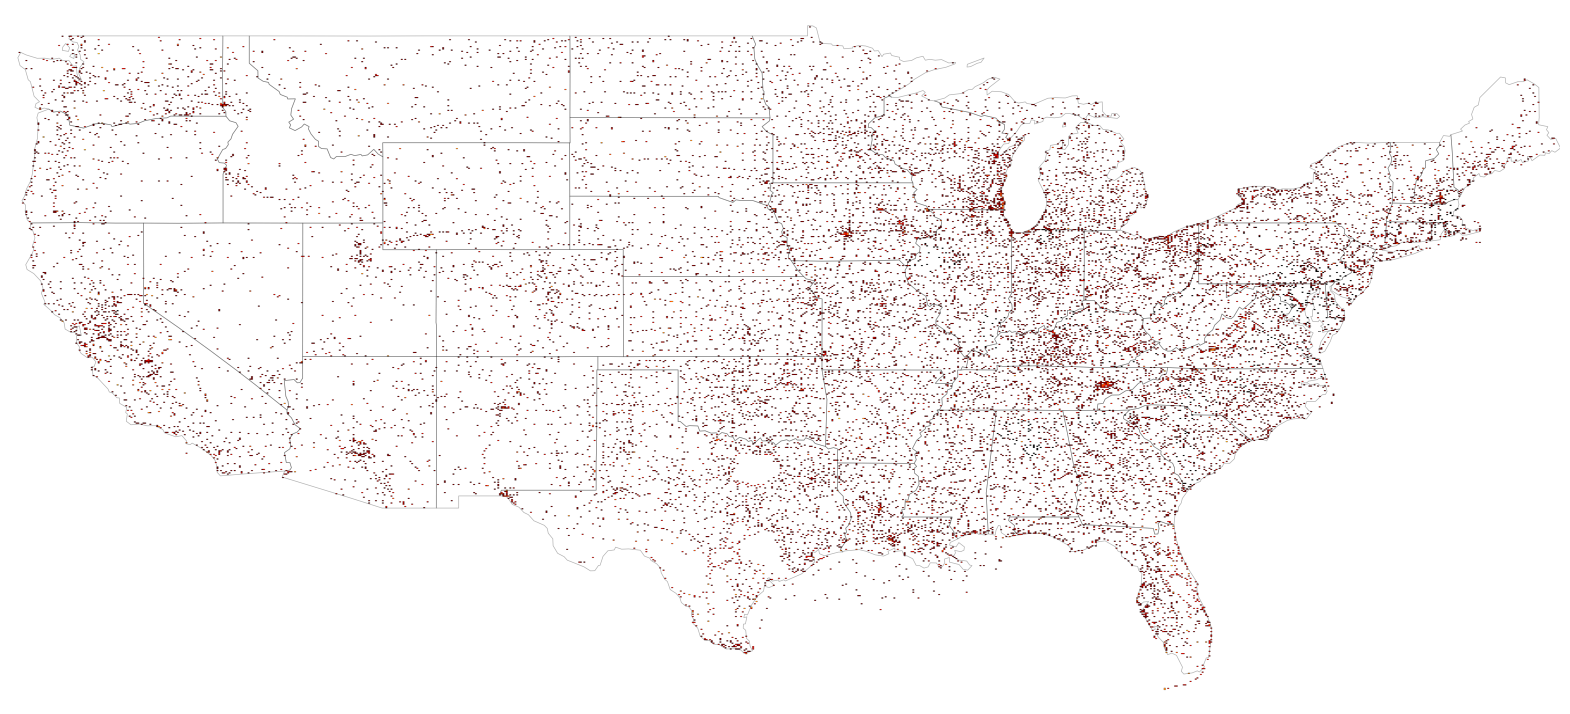

In [39]:

exclude_states = ['Alaska', 'Hawaii']
state_boundaries_gdf = state_boundaries_gdf[~state_boundaries_gdf['name'].isin(exclude_states)]

if cell_towers_gdf.crs is None:
    cell_towers_gdf.set_crs(epsg=4326, inplace=True)

canvas = ds.Canvas(plot_width=900, plot_height=600, x_range=(-125, -67), y_range=(24, 50))  # Bounds for the contiguous US

agg = canvas.points(cell_towers_gdf, 'londec', 'latdec', ds.count())

plot = tf.shade(agg, cmap=cc.fire, how='log')

img = plot.to_pil()

fig, ax = plt.subplots(figsize=(20, 17))
fig.patch.set_facecolor('white')

state_boundaries_gdf.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=0.5, alpha=0.3)

ax.imshow(img, extent=[-125, -67, 24, 50])

ax.set_facecolor('white')
ax.axis('off')

plt.show()


### Insights Into United States Cell Tower Landscape By Licensee

This data visualization provides insight into the top ten companies with the most cell towers in the United States, revealing AT&T and Verizon a providers with the largest counts. Lesser yet substantial numbers are held by companies like ALLTEL Corporation and Celico Partnership. The mapping of these towers highlights the extensive reach of these companies, showing a strategic placement that shapes the competitive telecom landscape. The spatial arrangement of these towers reflects a strategy employed by these telecommunications giants, intertwining urban centers, suburban expanses, and rural landscapes. Further, this placement reflects a comprehensive network coverage strategy, ensuring connectivity across diverse regions. The data analysis highlights the telecom industry's evolving nature, with emerging players like Celico Partnership and ALLTEL Corporation carving out significant niches. Despite their smaller tower counts, their strategically placed infrastructure reveals a targeted approach to meeting regional demands. In summary, highlighting both industry leaders' dominance and the network of emerging contenders, this visualization emphasizes the dynamic that shapes a competitive environment adapting to consumer needs and technological advancements.

In [40]:
licensee_counts = cell_towers_gdf.groupby('Licensee').size().reset_index(name='Count')

top_licensees = licensee_counts.sort_values(by='Count', ascending=False).head(10)['Licensee'].tolist()

columns_to_keep = ['Licensee', 'LatSec', 'LonSec', 'LocState']

cell_towers_gdf_trimmed = cell_towers_gdf[columns_to_keep]

cell_towers_gdf['londec'] = pd.to_numeric(cell_towers_gdf['londec'], errors='coerce')
cell_towers_gdf['latdec'] = pd.to_numeric(cell_towers_gdf['latdec'], errors='coerce')

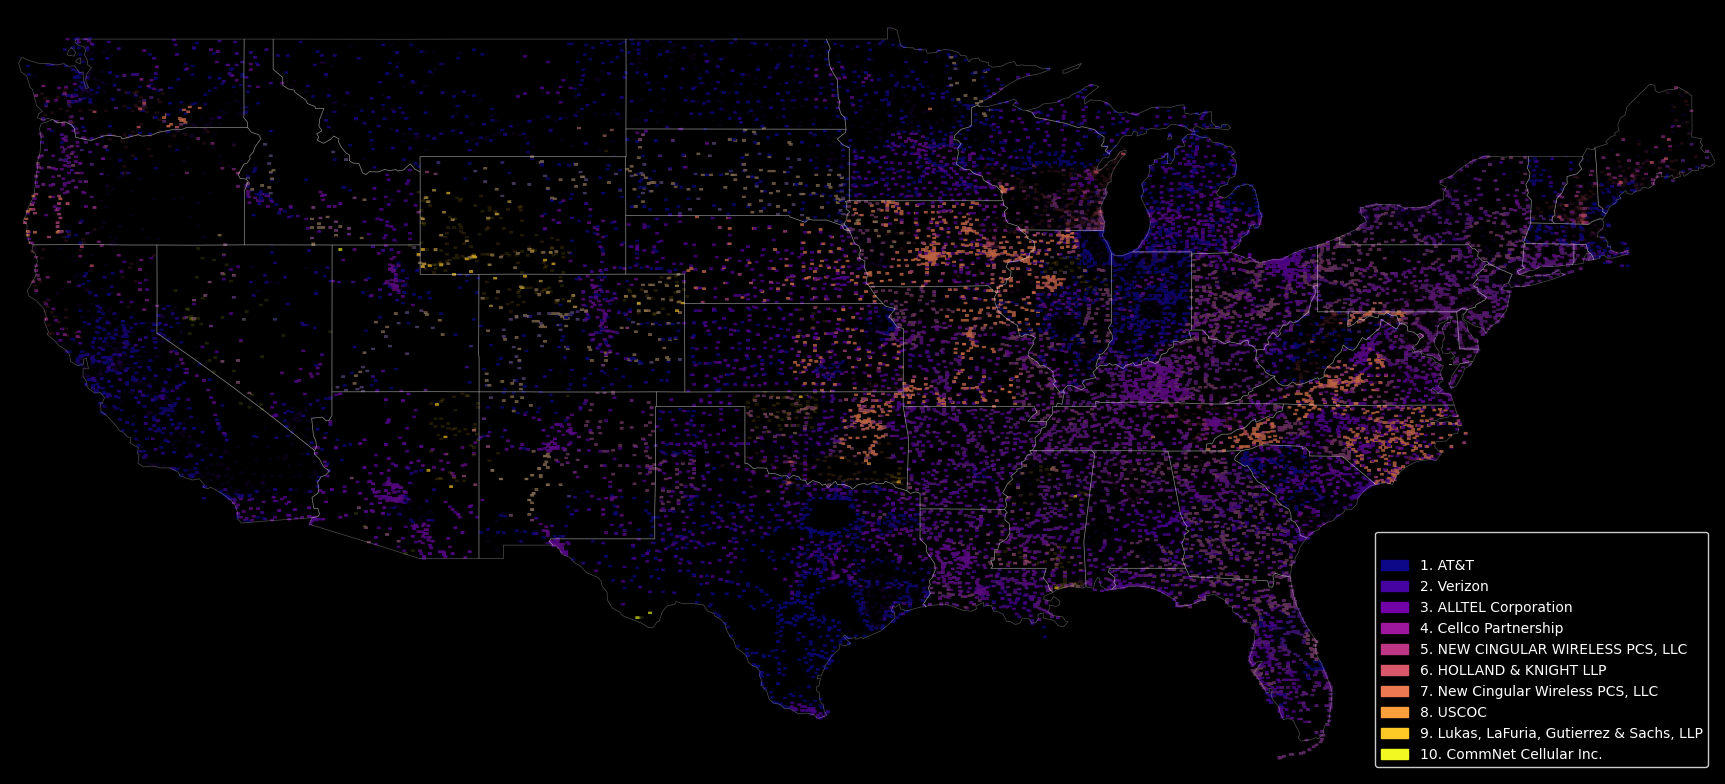

In [41]:
state_boundaries_gdf = gpd.read_file('./Data/states.json')
state_boundaries_gdf = state_boundaries_gdf.to_crs(epsg=4326)

exclude_states = ['Alaska', 'Hawaii']
state_boundaries_gdf = state_boundaries_gdf[~state_boundaries_gdf['name'].isin(exclude_states)]

if cell_towers_gdf.crs is None:
    cell_towers_gdf.set_crs(epsg=4326, inplace=True)

licensee_counts = cell_towers_gdf.groupby('Licensee').size().reset_index(name='Count')
top_licensees = licensee_counts.sort_values(by='Count', ascending=False).head(10)['Licensee'].tolist()

cell_towers_gdf = cell_towers_gdf[cell_towers_gdf['Licensee'].isin(top_licensees)]

cell_towers_gdf['Licensee'] = cell_towers_gdf['Licensee'].astype('category')

canvas = ds.Canvas(plot_width=1200, plot_height=800, x_range=(-125, -67), y_range=(24, 50))  # Increase plot_width and plot_height

agg = canvas.points(cell_towers_gdf, 'londec', 'latdec', ds.count_cat('Licensee'))

agg *= 1

plasma_cmap = plt.cm.get_cmap('plasma', len(top_licensees))
licensee_color = {licensee: matplotlib.colors.to_hex(plasma_cmap(i)) for i, licensee in enumerate(top_licensees)}

plot = tf.shade(agg, color_key=licensee_color)

spread_plot = tf.spread(plot, px=1)

fig, ax = plt.subplots(figsize=(22, 14), facecolor='black')

state_boundaries_gdf.plot(ax=ax, facecolor="none", edgecolor="white", linewidth=0.5, alpha=0.3)

ax.imshow(spread_plot.to_pil(), extent=[-125, -67, 24, 50], alpha=0.8)  # Reduce alpha for better visibility

ax.set_facecolor('black')
ax.axis('off')

legend_labels = [f"{i + 1}. {licensee}" for i, licensee in enumerate(top_licensees)]
legend_patches = [Patch(color=licensee_color[licensee]) for licensee in top_licensees]
legend = ax.legend(legend_patches, legend_labels, loc='lower right', title='Top Licensees', title_fontsize='large', facecolor='black')
legend.set_frame_on(True)
legend.get_frame().set_facecolor('black')
legend.get_frame().set_edgecolor('white') 
for text in legend.get_texts():
    text.set_color('white')

plt.show()


In [42]:

licensee_counts = cell_towers_gdf.groupby('Licensee').size().reset_index(name='Count')


top_licensees = licensee_counts.sort_values(by='Count', ascending=False).head(10)

top_licensee_colors = {k: licensee_color[k] for k in top_licensees['Licensee'] if k in licensee_color}

chart = alt.Chart(top_licensees).mark_bar().encode(
    x=alt.X('Count:Q', title='Number of Cell Towers'),
    y=alt.Y('Licensee:N', title='Licensee', sort='-x'),
    color=alt.Color('Licensee:N', scale=alt.Scale(domain=list(top_licensee_colors.keys()), range=list(top_licensee_colors.values()))),
    tooltip=['Licensee:N', 'Count:Q']
).properties(
    height=300  # Adjust the height as needed
).configure_view(
    continuousWidth=600,
    fill='#000000'  # Black background
).interactive()

chart

alt.Chart(...)

In [43]:

licensee_counts = cell_towers_gdf.groupby('Licensee').size().reset_index(name='Count')

top_licensees = licensee_counts.sort_values(by='Count', ascending=False).head(10)['Licensee']

cell_towers_gdf['LicenseeAdjusted'] = cell_towers_gdf['Licensee'].where(cell_towers_gdf['Licensee'].isin(top_licensees), 'Other')


state_licensee_counts_adjusted = cell_towers_gdf.groupby(['LocState', 'LicenseeAdjusted']).size().reset_index(name='Count')

licensee_colors_adjusted = {**licensee_color, 'Other': 'grey'}
unique_licensees_adjusted = top_licensees.tolist() + ['Other']


bar_chart = alt.Chart(state_licensee_counts_adjusted).mark_bar().encode(
    x=alt.X('Count:Q', title='Number of Cell Towers'),
    y=alt.Y('LocState:N', title='State', sort='-x'),
    color=alt.Color('LicenseeAdjusted:N', legend=alt.Legend(title="Licensee"),
                    scale=alt.Scale(domain=unique_licensees_adjusted, range=[licensee_colors_adjusted[lic] for lic in unique_licensees_adjusted])),
    tooltip=['LocState:N', 'LicenseeAdjusted:N', 'Count:Q']
).interactive()


styled_chart2 = bar_chart.configure_view(
    strokeWidth=0,
    fill='#000'
).properties(
    title='Number of Cell Towers per State by Licensee',
    width=600,
    height=800
)
styled_chart2

alt.Chart(...)

## Sources
- [OpenCellID](https://opencellid.com)
- [Federal Communications Commission (FCC)](https://hifld-geoplatform.opendata.arcgis.com/datasets/geoplatform::cellular-towers/about)